In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector as connector
import warnings
warnings.filterwarnings("ignore")


In [2]:
conn = connector.connect(
   host="localhost",      # or "127.0.0.1"
    user="root",           # your MySQL username
    password="1234",
    database="world"
)

In [3]:
query = """
SHOW TABLES
"""
df = pd.read_sql(query, conn)
df.head()

,Tables_in_world
0,city
1,country
2,countrylanguage


How many columns there are in table?

In [17]:
query = """SHOW COLUMNS FROM city"""

df = pd.read_sql(query, conn)
df

,Field,Type,Null,Key,Default,Extra
0,ID,int,NO,PRI,None,auto_increment
1,Name,char(35),NO,,,
2,CountryCode,char(3),NO,MUL,,
3,District,char(20),NO,,,
4,Population,int,NO,,0,


How many countries there are?

In [5]:
query = """SELECT COUNT(*) AS total_countries FROM country;
"""
df = pd.read_sql(query, conn)
df

,total_countries
0,239


How many countries there in continent?

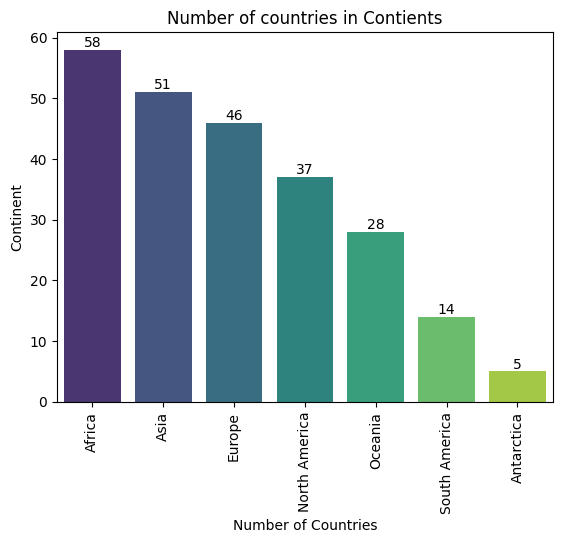

In [6]:
query = """SELECT Continent, COUNT(*) AS NumberOfCountries FROM country GROUP BY Continent ORDER BY NumberOfCountries DESC"""

df = pd.read_sql(query, conn)

ax=sns.barplot(
    y="NumberOfCountries", 
    x="Continent", 
    data=df, 
    palette="viridis",
    estimator=sum, ci=None
)
for container in ax.containers:
    ax.bar_label(container)
plt.title("Number of countries in Contients")
plt.xlabel("Number of Countries")
plt.ylabel("Continent")
plt.xticks(rotation=90)
plt.show()


Which 10 countries have the highest population?

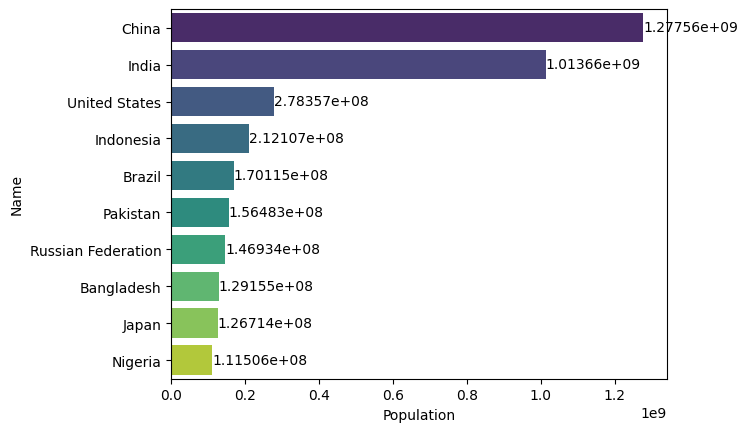

In [7]:
query = """SELECT *  FROM country ORDER BY Population DESC LIMIT 10;"""
df = pd.read_sql(query, conn)

ax = sns.barplot(
    y="Name",
    x="Population",
    palette='viridis',
    data=df,
)

for container in ax.containers:
    ax.bar_label(container)
plt.show()


Which 10 countries have the lowest population?

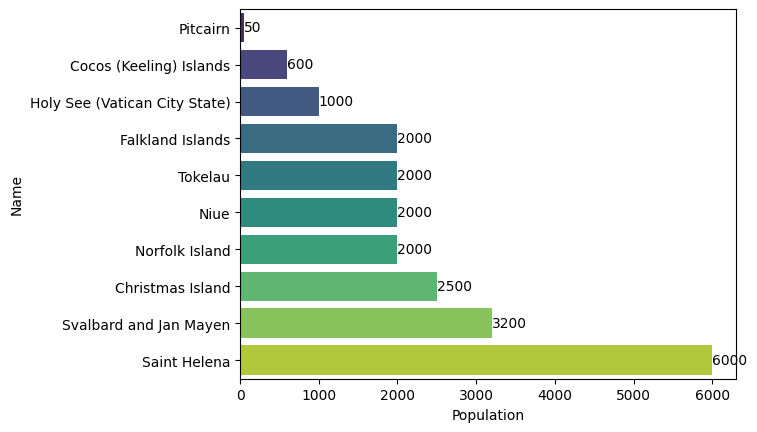

In [8]:
query = """SELECT *  FROM country WHERE Population > 0 ORDER BY Population  ASC LIMIT 10 ;"""
df = pd.read_sql(query, conn)

ax = sns.barplot(
    y="Name",
    x="Population",
    palette='viridis',
    data=df,
)

for container in ax.containers:
    ax.bar_label(container)
plt.show()


What is the total population of each continent?

In [9]:
query = """SELECT Continent, SUM(Population) AS TotalPopulation FROM country GROUP BY Continent ORDER BY TotalPopulation DESC;"""
df = pd.read_sql(query, conn)
df

,Continent,TotalPopulation
0,Asia,3.705026e+09
1,Africa,7.844750e+08
2,Europe,7.300746e+08
3,North America,4.829930e+08
4,South America,3.457800e+08
5,Oceania,3.040115e+07
6,Antarctica,0.000000e+00


What is the average life expectancy per continent?

In [10]:
query = """SELECT Continent, AVG(LifeExpectancy) FROM country GROUP BY Continent"""
df = pd.read_sql(query, conn)
df

,Continent,AVG(LifeExpectancy)
0,North America,72.99189
1,Asia,67.44118
2,Africa,52.57193
3,Europe,75.14773
4,South America,70.94615
5,Oceania,69.71500
6,Antarctica,NaN


Which 10 countries have the highest GNP?

In [11]:
query = """SELECT Name,GNP FROM COUNTRY ORDER BY GNP DESC LIMIT 10"""
df = pd.read_sql(query, conn)
df

,Name,GNP
0,United States,8510700.0
1,Japan,3787042.0
2,Germany,2133367.0
3,France,1424285.0
4,United Kingdom,1378330.0
5,Italy,1161755.0
6,China,982268.0
7,Brazil,776739.0
8,Canada,598862.0
9,Spain,553233.0


Which 10 countries have the highest GNP per capita?

In [12]:
query = """SELECT Name, GNP,Population, (GNP/Population) AS GNPPerCapita FROM country WHERE Population > 0 ORDER BY GNPPerCapita DESC LIMIT 10; """
df = pd.read_sql(query, conn)
df

,Name,GNP,Population,GNPPerCapita
0,Luxembourg,16321.0,435700,0.037459
1,Switzerland,264478.0,7160400,0.036936
2,Bermuda,2328.0,65000,0.035815
3,Brunei,11705.0,328000,0.035686
4,Liechtenstein,1119.0,32300,0.034644
5,Cayman Islands,1263.0,38000,0.033237
6,Denmark,174099.0,5330000,0.032664
7,Norway,145895.0,4478500,0.032577
8,United States,8510700.0,278357000,0.030575
9,Japan,3787042.0,126714000,0.029887


Find the average surface area of countries by continent.

In [13]:
query = """SELECT Continent, AVG(SurfaceArea) AS AvgSurfaceArea
FROM country
GROUP BY Continent
ORDER BY AvgSurfaceArea DESC;
"""

df = pd.read_sql(query, conn)
df

,Continent,AvgSurfaceArea
0,Antarctica,2.626420e+06
1,South America,1.276066e+06
2,North America,6.544451e+05
3,Asia,6.251177e+05
4,Africa,5.215582e+05
5,Europe,5.010681e+05
6,Oceania,3.058676e+05


Which continents have more than 20 countries?

In [14]:
query = """SELECT Continent, Count(Name) AS CountriesPerContinent FROM country GROUP BY Continent HAVING COUNT(Name) > 20"""
df = pd.read_sql(query, conn)
df

,Continent,CountriesPerContinent
0,North America,37
1,Asia,51
2,Africa,58
3,Europe,46
4,Oceania,28


In [15]:
query = """SELECT Continent, AVG(Population) AS AvgPopulationPerCountry
FROM country
GROUP BY Continent
ORDER BY AvgPopulationPerCountry DESC;"""

df = pd.read_sql(query, conn)
df


,Continent,AvgPopulationPerCountry
0,Asia,7.264756e+07
1,South America,2.469857e+07
2,Europe,1.587119e+07
3,Africa,1.352543e+07
4,North America,1.305386e+07
5,Oceania,1.085755e+06
6,Antarctica,0.000000e+00


How many countries speak each language (from countrylanguage table)?

In [20]:
query = """SELECT Language, COUNT(DISTINCT CountryCode) AS CountriesSpeaking
FROM countrylanguage
GROUP BY Language
ORDER BY CountriesSpeaking DESC; """

df = pd.read_sql(query, conn)
df.head()


,Language,CountriesSpeaking
0,English,60
1,Arabic,33
2,Spanish,28
3,French,25
4,Chinese,19


Which languages are the top 10 most widely spoken in terms of population?

In [23]:
query = """
SELECT countrylanguage.Language, country.Population
FROM country
LEFT JOIN countrylanguage 
    ON country.Code = countrylanguage.CountryCode
ORDER BY country.Population DESC
LIMIT 10;
"""

df = pd.read_sql(query, conn)
df


,Language,Population
0,Chinese,1277558000
1,Dong,1277558000
2,Hui,1277558000
3,Mantšu,1277558000
4,Miao,1277558000
5,Mongolian,1277558000
6,Puyi,1277558000
7,Tibetan,1277558000
8,Tujia,1277558000
9,Uighur,1277558000


Find the top 10 most populated cities.

In [26]:
query = """SELECT * FROM city ORDER BY Population DESC LIMIT 10"""

df = pd.read_sql(query, conn)
df

,ID,Name,CountryCode,District,Population
0,1024,Mumbai (Bombay),IND,Maharashtra,10500000
1,2331,Seoul,KOR,Seoul,9981619
2,206,São Paulo,BRA,São Paulo,9968485
3,1890,Shanghai,CHN,Shanghai,9696300
4,939,Jakarta,IDN,Jakarta Raya,9604900
5,2822,Karachi,PAK,Sindh,9269265
6,3357,Istanbul,TUR,Istanbul,8787958
7,2515,Ciudad de México,MEX,Distrito Federal,8591309
8,3580,Moscow,RUS,Moscow (City),8389200
9,3793,New York,USA,New York,8008278


Which continent has the highest average life expectancy?

In [27]:
query = """SELECT Continent, AVG(LifeExpectancy) AS AvgLifeExpectancy FROM country GROUP BY Continent ORDER BY AvgLifeExpectancy DESC"""
df = pd.read_sql(query, conn)
df

,Continent,AvgLifeExpectancy
0,Europe,75.14773
1,North America,72.99189
2,South America,70.94615
3,Oceania,69.71500
4,Asia,67.44118
5,Africa,52.57193
6,Antarctica,NaN


Which 5 countries have the lowest GNP per capita?

In [30]:
query = """SELECT Name, GNP,Population, (GNP/Population) AS GNPPerCapita FROM country WHERE Population > 0 ORDER BY GNPPerCapita ASC LIMIT 5; """
df = pd.read_sql(query, conn)
df

,Name,GNP,Population,GNPPerCapita
0,Faroe Islands,0.0,43000,0.0
1,Greenland,0.0,56000,0.0
2,Christmas Island,0.0,2500,0.0
3,Falkland Islands,0.0,2000,0.0
4,Cocos (Keeling) Islands,0.0,600,0.0


Show the distribution of population across all countries (histogram).

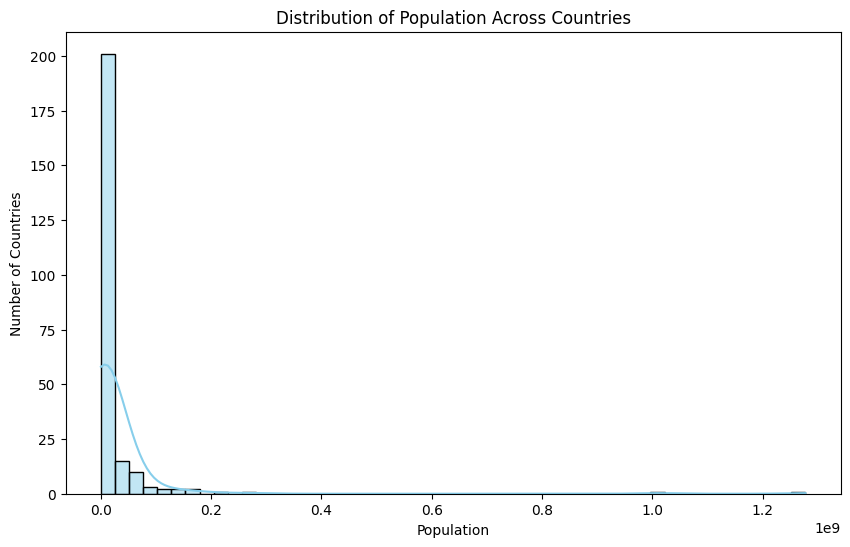

In [31]:

query = "SELECT Name, Population FROM country;"
df = pd.read_sql(query, conn)

# Plot
plt.figure(figsize=(10,6))
sns.histplot(df['Population'], bins=50, kde=True, color="skyblue")
plt.title("Distribution of Population Across Countries")
plt.xlabel("Population")
plt.ylabel("Number of Countries")
plt.show()


Show the distribution of life expectancy across all countries (histogram).

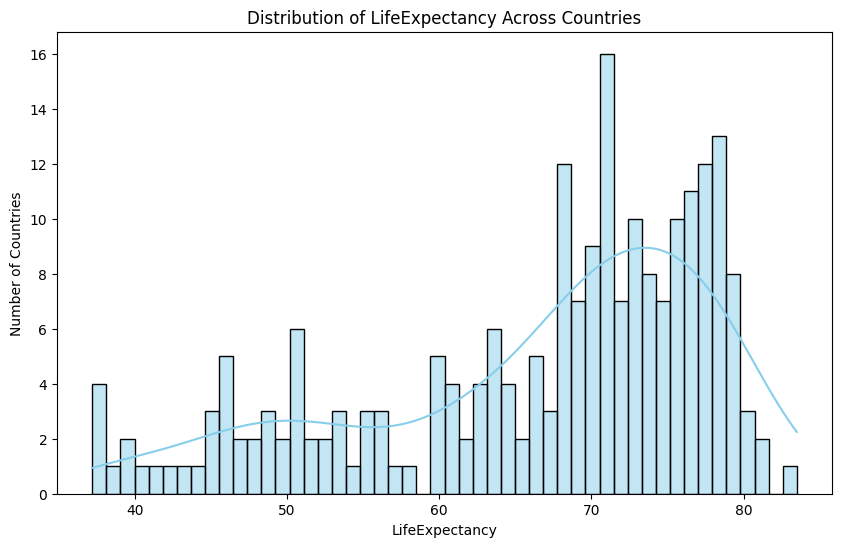

In [32]:

query = "SELECT Name, LifeExpectancy FROM country;"
df = pd.read_sql(query, conn)

# Plot
plt.figure(figsize=(10,6))
sns.histplot(df['LifeExpectancy'], bins=50, kde=True, color="skyblue")
plt.title("Distribution of LifeExpectancy Across Countries")
plt.xlabel("LifeExpectancy")
plt.ylabel("Number of Countries")
plt.show()


How many cities are there in each country?

In [34]:
query = """SELECT country.Name, COUNT(city.Name) AS TotalCities FROM country LEFT JOIN city ON country.Code = city.CountryCode GROUP BY country.Name ORDER BY TotalCities DESC"""
df = pd.read_sql(query, conn)
df

,Name,TotalCities
0,China,363
1,India,341
2,United States,274
3,Brazil,250
4,Japan,248
...,...,...
234,Bouvet Island,0
235,Heard Island and McDonald Islands,0
236,British Indian Ocean Territory,0
237,South Georgia and the South Sandwich Islands,0


Compare the average GNP of Asian vs European countries.

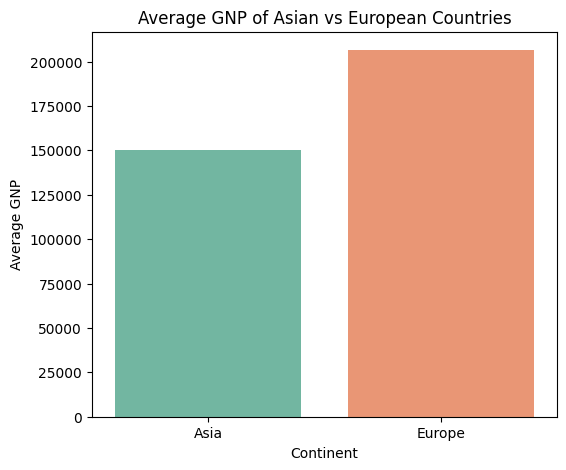

In [ ]:
query = """
SELECT Continent, AVG(GNP) AS AvgGNP
FROM country
WHERE Continent IN ('Asia', 'Europe')
GROUP BY Continent;
"""

df = pd.read_sql(query, conn)

plt.figure(figsize=(6,5))
sns.barplot(data=df, x="Continent", y="AvgGNP", palette="Set2")
plt.title("Average GNP of Asian vs European Countries")
plt.ylabel("Average GNP")
plt.xlabel("Continent")
plt.show()


Which continent has the highest average life expectancy, and how does it compare to others?

<Axes: xlabel='AvgLifeExpectancy', ylabel='Continent'>

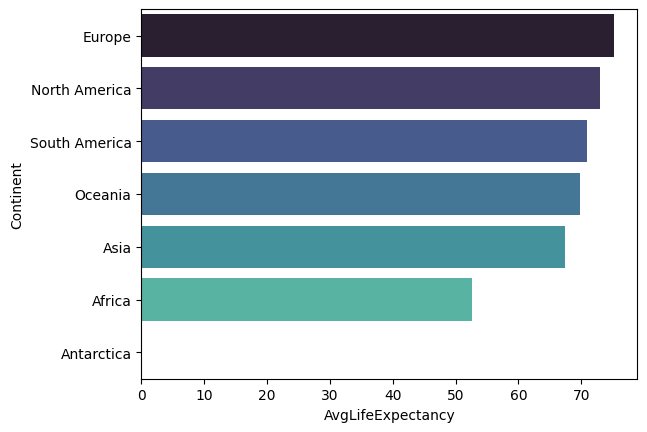

In [9]:
query = """SELECT Continent, AVG(LifeExpectancy) AS AvgLifeExpectancy FROM country GROUP BY Continent ORDER BY AvgLifeExpectancy DESC"""
df = pd.read_sql(query, conn)

sns.barplot(y='Continent', x='AvgLifeExpectancy', data=df, palette='mako')

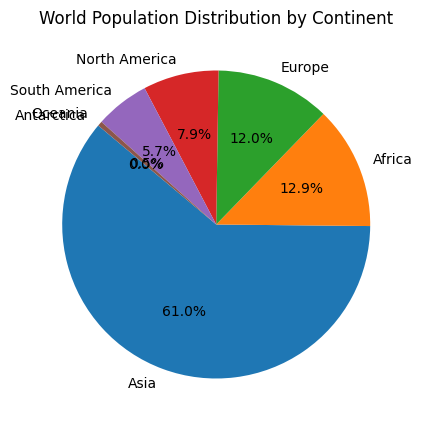

In [18]:
query = """
SELECT Continent,
       SUM(Population) AS TotalPopulation,
       (SUM(Population) * 100.0 / (SELECT SUM(Population) FROM country)) AS ContinentPercentage
FROM country
GROUP BY Continent
ORDER BY ContinentPercentage DESC;
"""
df = pd.read_sql(query, conn)
df

# Pie chart
plt.figure(figsize=(5,5))
plt.pie(df['TotalPopulation'], labels=df['Continent'], autopct='%1.1f%%', startangle=140)
plt.title("World Population Distribution by Continent")
plt.show()

Among countries with population > 50 million, which have the lowest life expectancy?

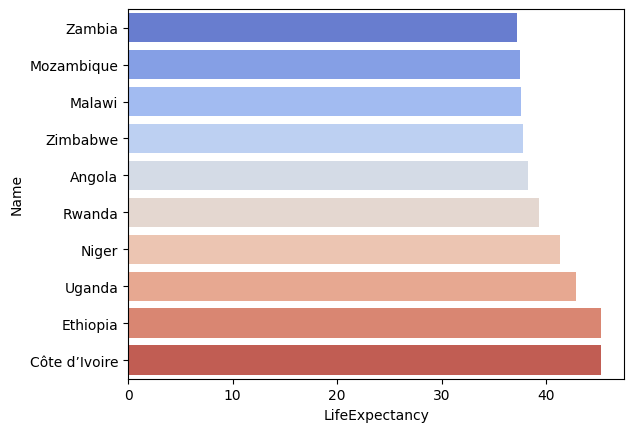

In [7]:
query = """SELECT Name, Population, Continent, LifeExpectancy FROM country WHERE population > 5000000 ORDER BY LifeExpectancy ASC LIMIT 10"""

df = pd.read_sql(query, conn)


sns.barplot(y='Name', x='LifeExpectancy',data=df, palette='coolwarm')
plt.show()

Compare the total number of official languages spoken across continents

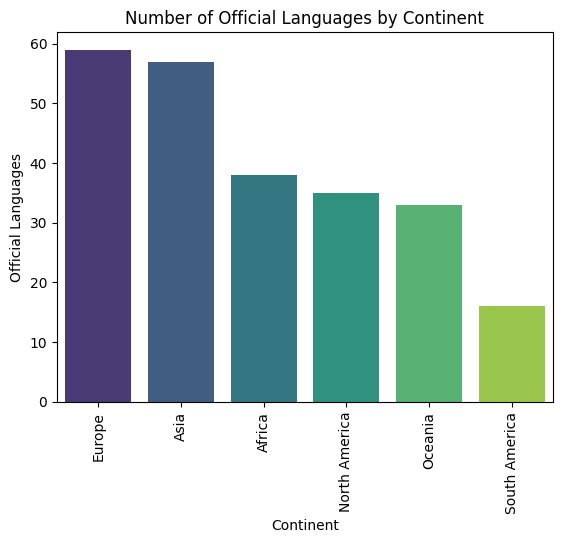

In [15]:
query = """
SELECT c.Continent,
       COUNT(DISTINCT cl.Language) AS TotalLanguages,
       SUM(CASE WHEN cl.IsOfficial = 'T' THEN 1 ELSE 0 END) AS OfficialLanguages
FROM country AS c
INNER JOIN countrylanguage AS cl ON c.Code = cl.CountryCode
GROUP BY c.Continent
ORDER BY OfficialLanguages DESC;
"""
df = pd.read_sql(query, conn)

sns.barplot(data=df, x='Continent', y='OfficialLanguages', palette='viridis')
plt.title('Number of Official Languages by Continent')
plt.xlabel('Continent')
plt.ylabel('Official Languages')
plt.xticks(rotation=90)
plt.show()


Find the correlation between surface area and population density.

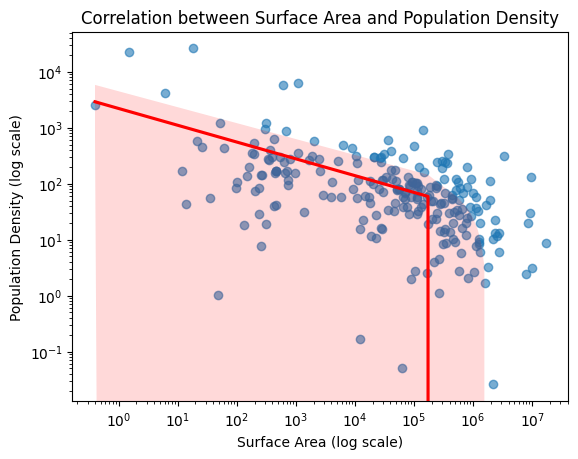

In [22]:
query = """SELECT Name, Population, SurfaceArea, Continent, (Population/SurfaceArea) AS PopulationDensity FROM country WHERE Population > 0 AND SurfaceArea >0  """
df = pd.read_sql(query, conn)

sns.regplot(
    data=df,
    x='SurfaceArea',
    y='PopulationDensity',
    scatter_kws={'alpha':0.6},
    line_kws={'color':'red'},
    logx=True 
)
plt.xscale('log')  
plt.yscale('log') 
plt.title('Correlation between Surface Area and Population Density')
plt.xlabel('Surface Area (log scale)')
plt.ylabel('Population Density (log scale)')
plt.show()


Show the distribution of city populations within a single country

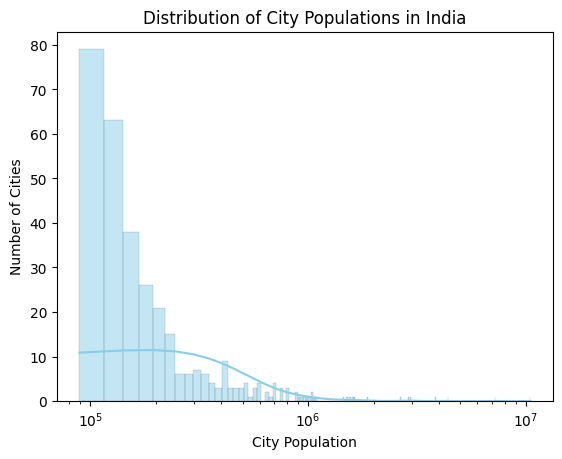

In [7]:
query = """SELECT city.Name, city.Population FROM city INNER JOIN country ON country.Code = city.CountryCode WHERE country.Name = 'India'"""

df = pd.read_sql(query, conn)
sns.histplot(df['Population'], bins=400, kde=True, color='skyblue')
plt.title('Distribution of City Populations in India')
plt.xlabel('City Population')
plt.ylabel('Number of Cities')
plt.xscale('log') 
plt.show()

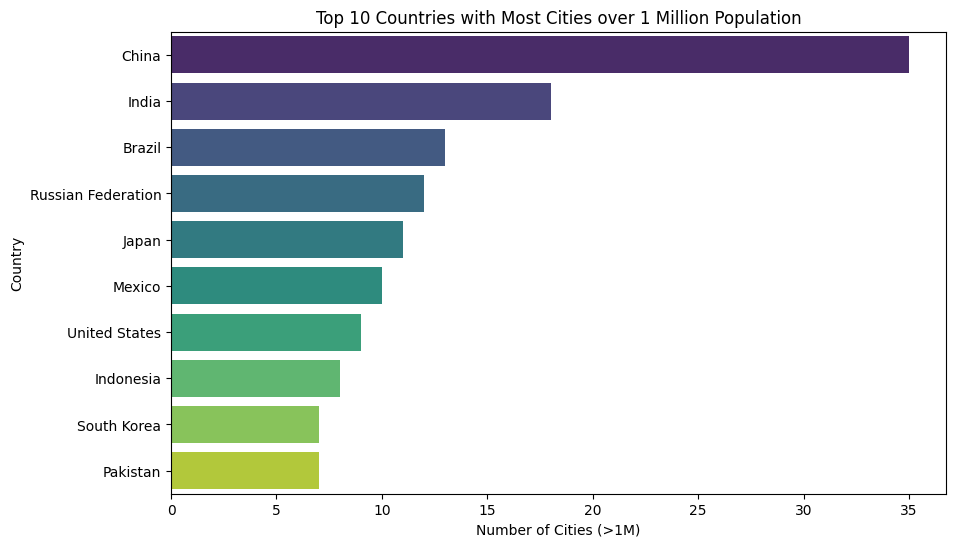

In [14]:
query = """
SELECT country.Name AS Country, COUNT(city.ID) AS NumLargeCities
FROM city
JOIN country ON city.CountryCode = country.Code
WHERE city.Population > 1000000
GROUP BY country.Name
ORDER BY NumLargeCities DESC
LIMIT 10;
"""
df = pd.read_sql(query, conn)
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='NumLargeCities', y='Country', palette='viridis')
plt.title('Top 10 Countries with Most Cities over 1 Million Population')
plt.xlabel('Number of Cities (>1M)')
plt.ylabel('Country')
plt.show()